In [2]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as pyplot
import datetime

Function to convert CSV files to pandas DataFrame. Discarding the description sentences on top of each file

In [4]:
def csv2dataframe(fileName):
    newdata=[]
    with open(fileName,'r') as fileData:
        rowData = csv.reader(fileData, 
                           delimiter = ',', 
                           quotechar = '"')
        for data in rowData:
            if len(data)>2:
                newdata.append(data[0:3])
    data_array = np.asarray(newdata)
    return convertDateTime(data_array)

First Column of the array is datetime with 'PST' extension. This function strips timezone and converts it into numpy datetime64 format

In [5]:
def convertDateTime(data_array):
    firstCol=data_array[1:,0]
    stripFirstCol=[ele.rstrip(' PST') for ele in firstCol]
    
    dateTimeFirstCol=[np.datetime64(ele) for ele in stripFirstCol]
    data_array[1:,0]=dateTimeFirstCol
    data_frame=pd.DataFrame(data_array.reshape(len(data_array),-1))
    
    data_frame.index=data_frame[0]
    data_frame=data_frame.drop(data_frame.columns[0],axis=1)


    data_frame.columns=data_frame.iloc[0]
    data_frame=data_frame.drop(data_frame.index[0])
    
    data_frame=data_frame.astype(str).astype(float)
    data_frame.index=pd.to_datetime(data_frame.index)
    data_frame=data_frame.resample('15T').mean()
    data_frame=data_frame[1:]
    return data_frame

In [6]:
reactivePfile='R3_12_47_1_AMI_residential_phase12_reactive_power.csv'
realPfile='R3_12_47_1_AMI_residential_phase12_real_power.csv'
reactiveVfile='R3_12_47_1_AMI_residential_phase12_reactive_voltage.csv'
realVfile='R3_12_47_1_AMI_residential_phase12_real_voltage.csv'

In [330]:
reactivePower=csv2dataframe(reactivePfile)
realPower=csv2dataframe(realPfile)
reactiveVoltage=csv2dataframe(reactiveVfile)
realVoltage=csv2dataframe(realVfile)

In [331]:
reactiveP=reactivePower
realP=realPower
reactiveV=reactiveVoltage
realV=realVoltage

In [158]:
def getDateList(startDate,endDate):
    startDate=datetime.datetime.strptime(startDate,'%Y-%m-%d')
    #startDate=realPower.index[0]
    #startDate=startDate.date()

    endDate=datetime.datetime.strptime(endDate,'%Y-%m-%d')
    #endDate=realPower.index[len(realPower)-1]
    #endDate=endDate.date()

    numDays=endDate-startDate
    numDays=numDays.days

    date_list = [startDate + datetime.timedelta(days=x) for x in range(0, numDays)]
    return date_list

In [160]:
seasonDates=['2013-01-01','2013-03-01','2013-05-15']

In [109]:
def splitWDWE(data_frame,weekdays,weekends):
    weekdayResult=getDays(data_frame,weekdays)
    weekendResult=getDays(data_frame,weekends)
    return weekdayResult, weekendResult

In [110]:
def getDaysHours(data_frame,days,hour):
    result=data_frame[days[0]]
    for i in range(1,len(days)):
            result=result.append(data_frame[days[i]])
    return result

In [324]:
def getHourData(data_frame,hourwindow,hr):
    if hourwindow==1:
        result=data_frame[data_frame.index.hour == hr]
    else:
        result=data_frame[data_frame.index.hour == hr]
        for i in range(1,hourwindow+1):
            hr=hr+i
            result=result.append(data_frame[data_frame.index.hour == hr])
            
    return result
        
        

CALCULATES THE REAL AND REACTIVE COEEFICIENTS OF WEEKDAYS AND WEEKENDS

Season  1
2013-01-01
2013-03-01
Weekdays
0 to 1


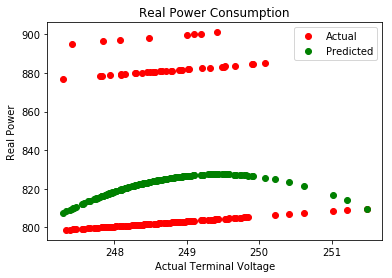

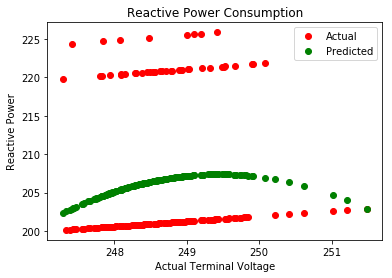

1 to 2


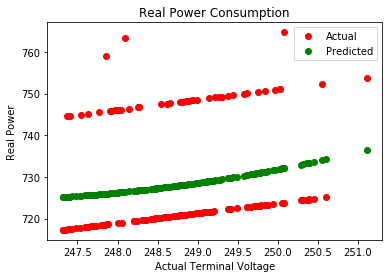

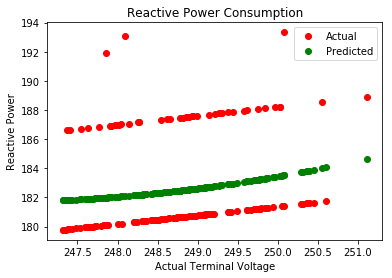

2 to 3


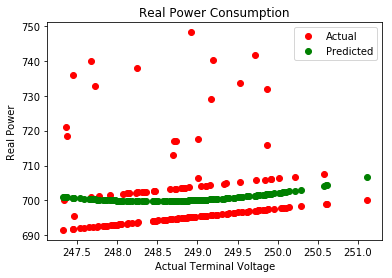

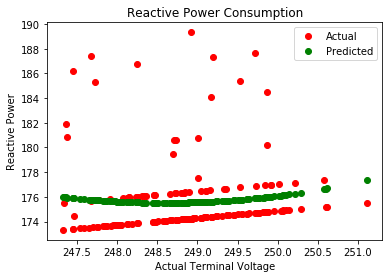

3 to 4


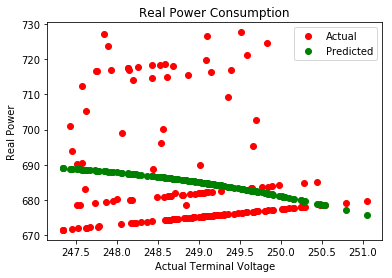

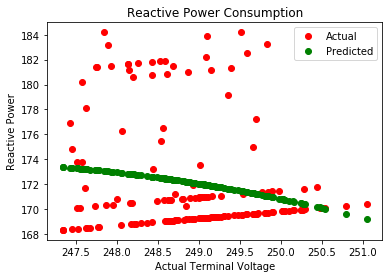

4 to 5


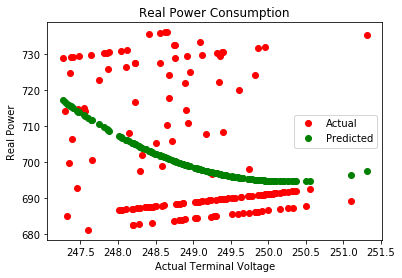

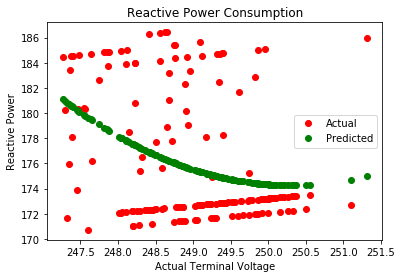

5 to 6


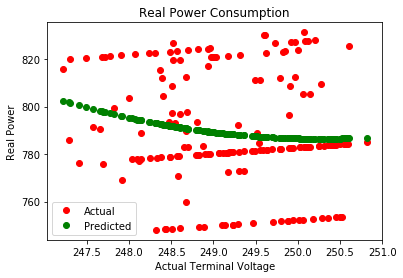

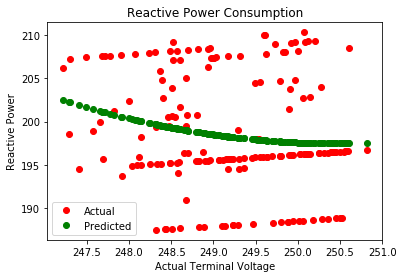

6 to 7


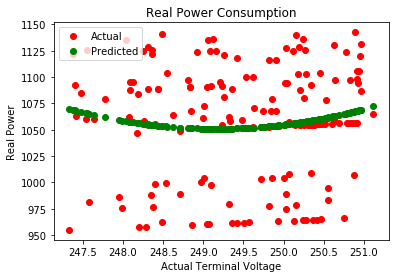

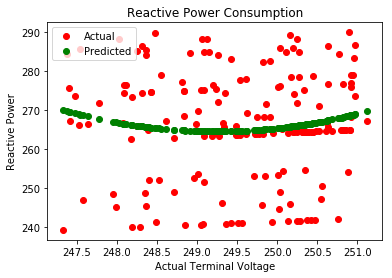

7 to 8


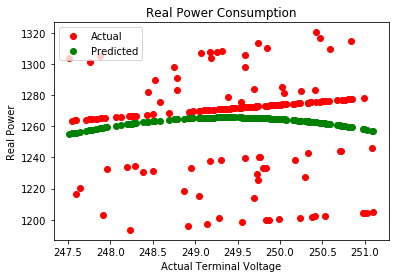

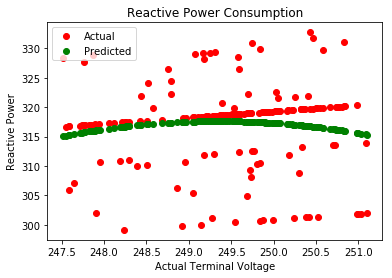

8 to 9


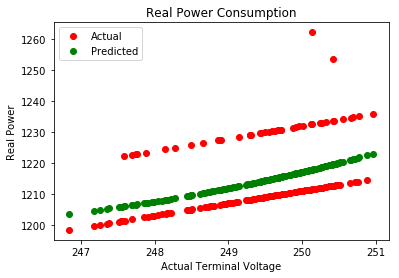

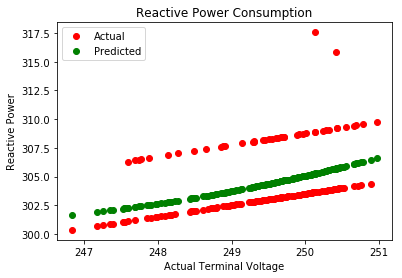

9 to 10


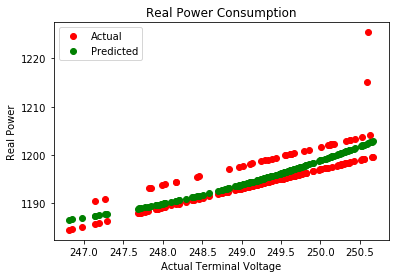

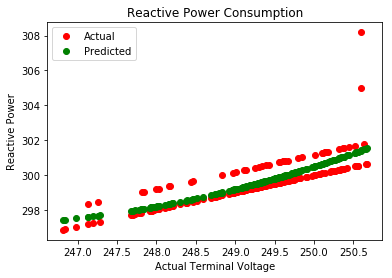

10 to 11


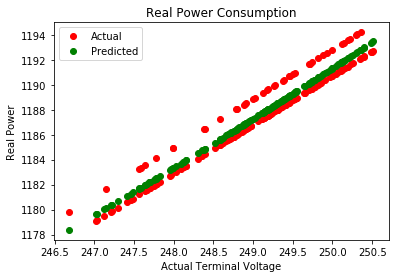

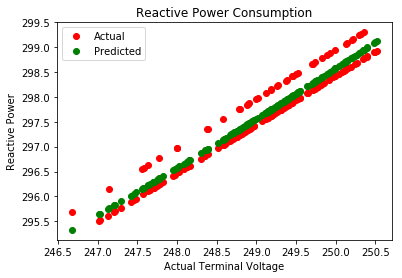

11 to 12


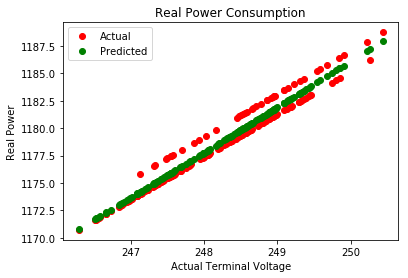

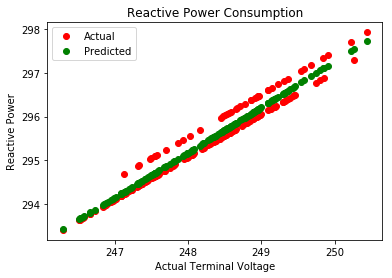

12 to 13


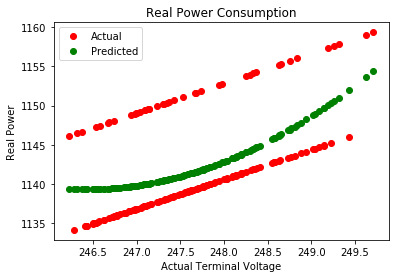

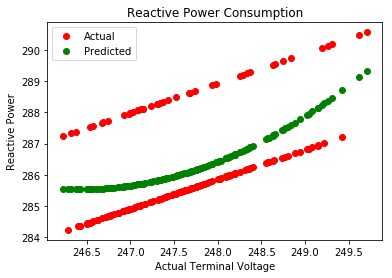

13 to 14


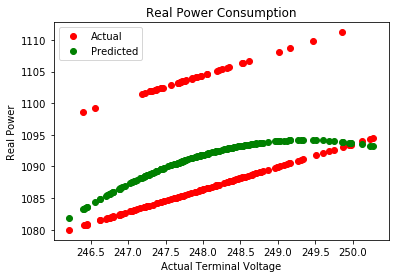

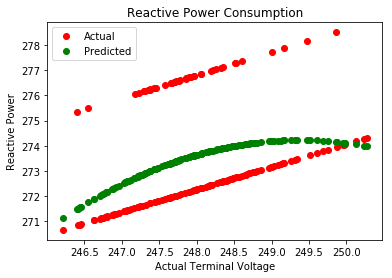

14 to 15


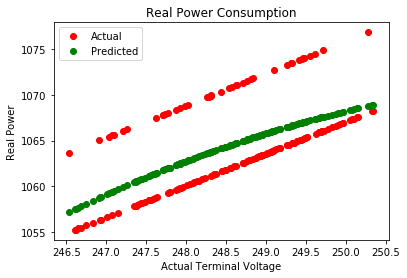

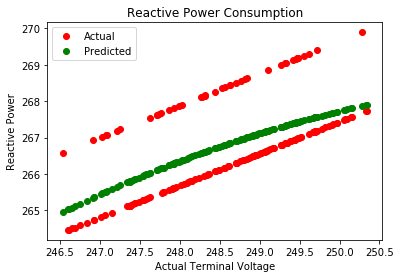

15 to 16


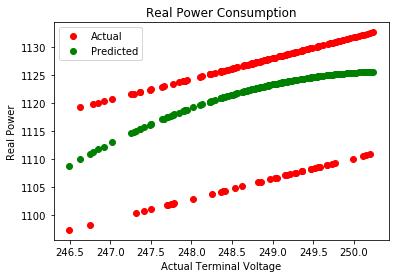

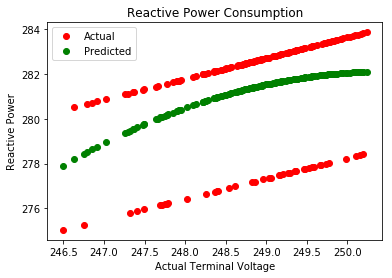

16 to 17


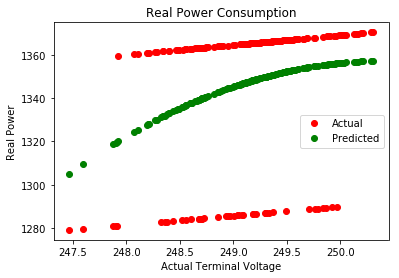

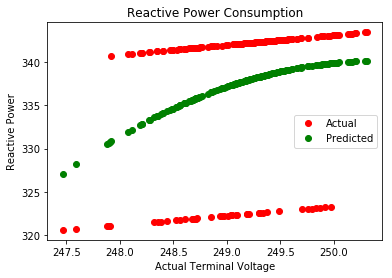

17 to 18


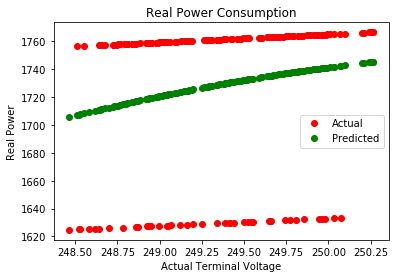

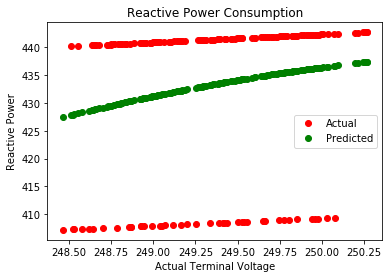

18 to 19


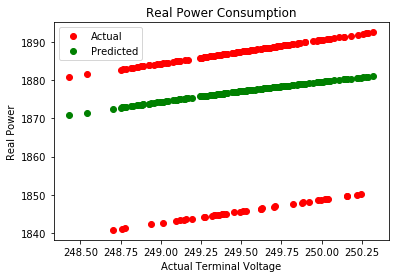

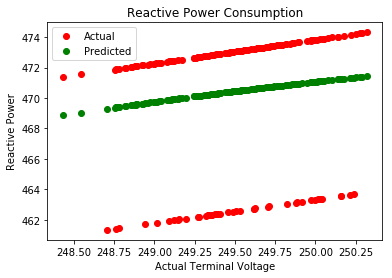

19 to 20


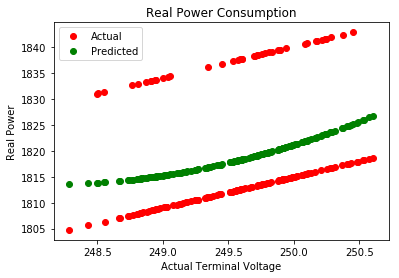

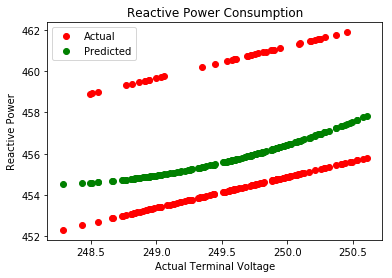

20 to 21


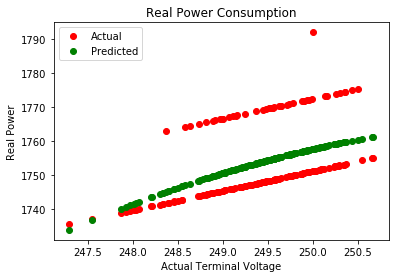

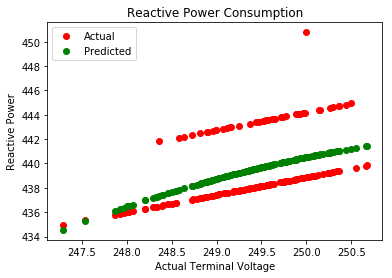

21 to 22


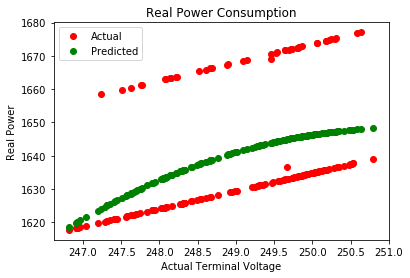

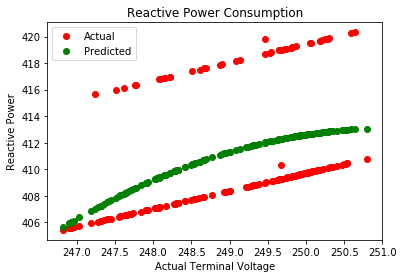

22 to 23


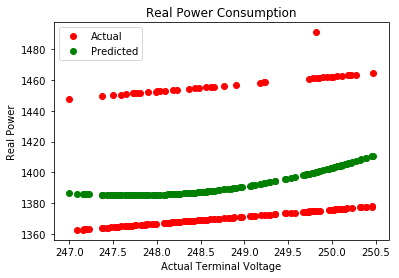

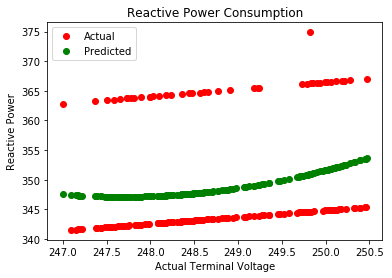

Weekends
0 to 1


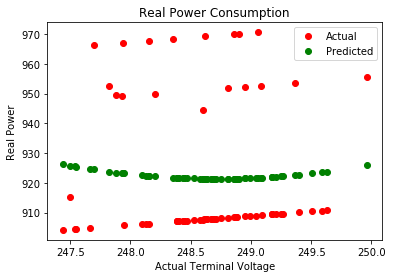

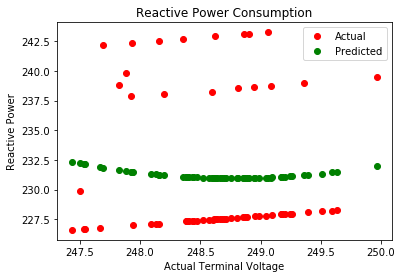

1 to 2


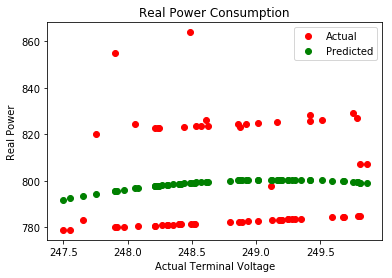

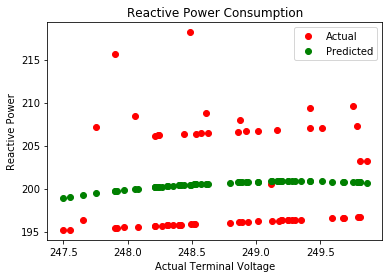

2 to 3


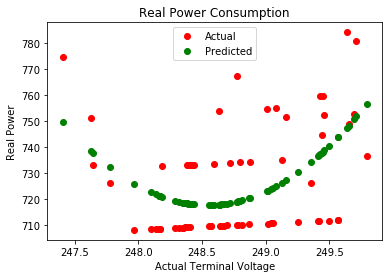

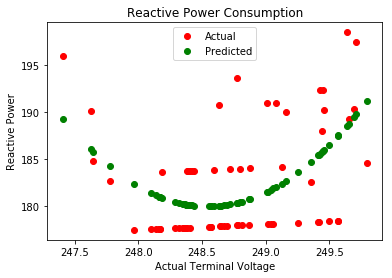

3 to 4


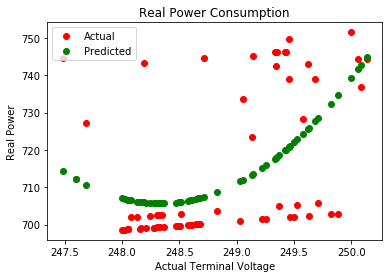

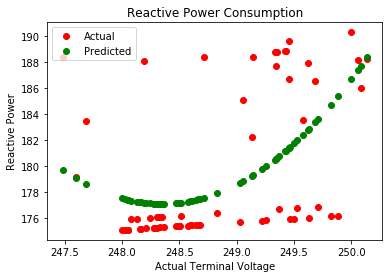

4 to 5


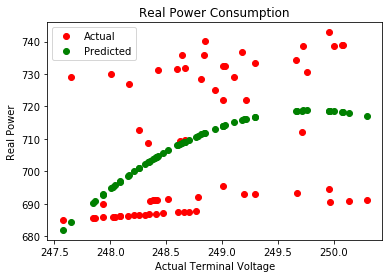

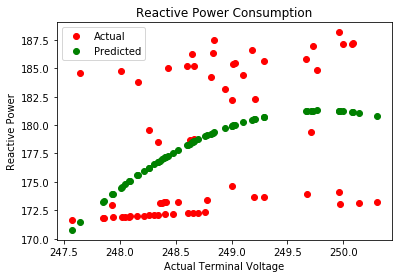

5 to 6


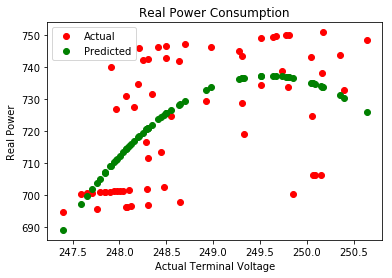

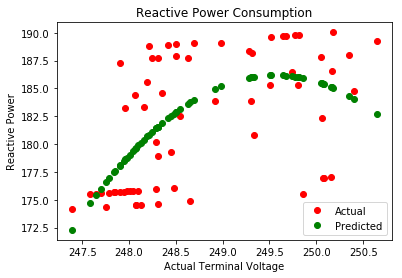

6 to 7


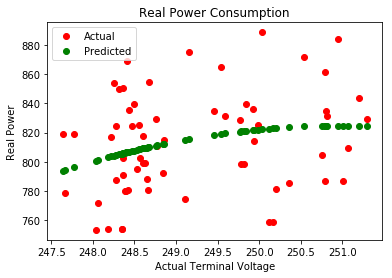

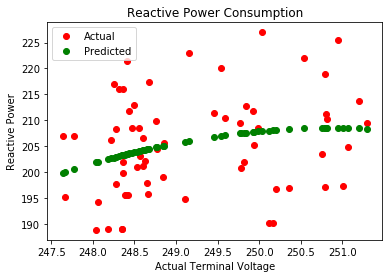

7 to 8


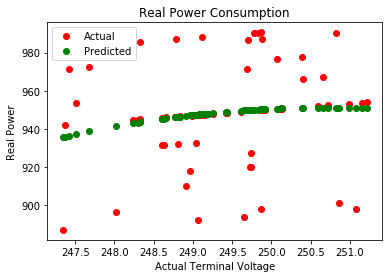

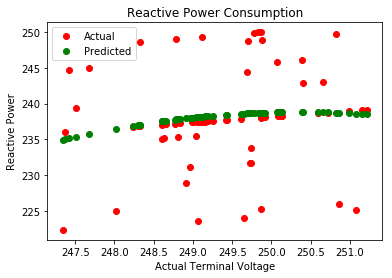

8 to 9


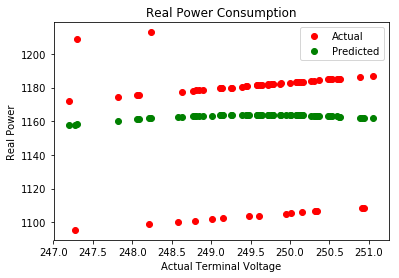

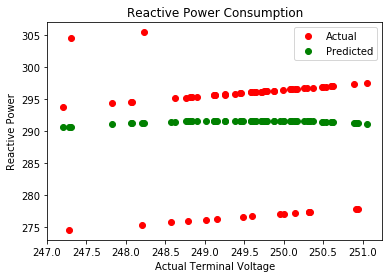

9 to 10


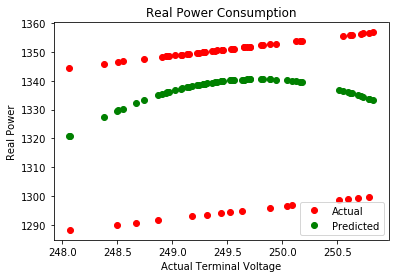

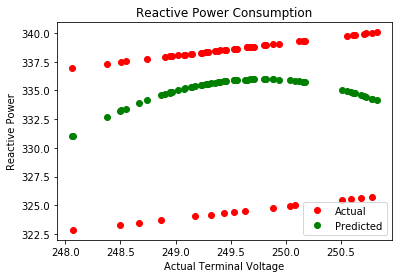

10 to 11


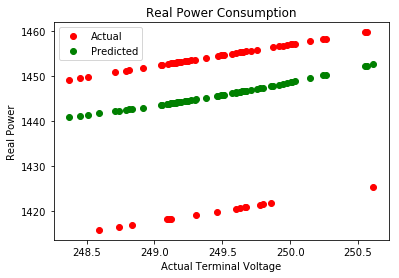

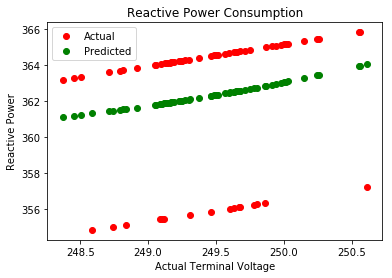

11 to 12


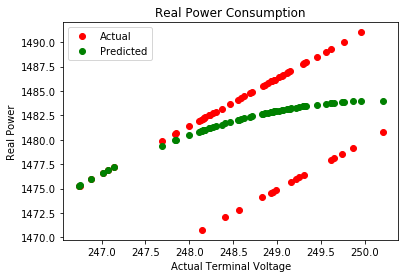

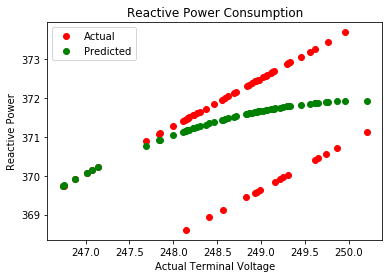

12 to 13


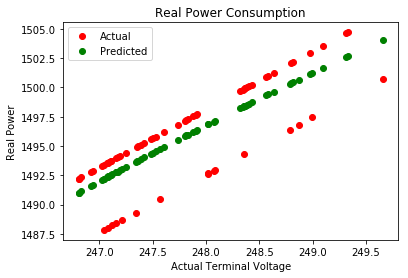

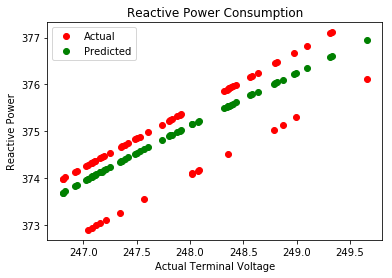

13 to 14


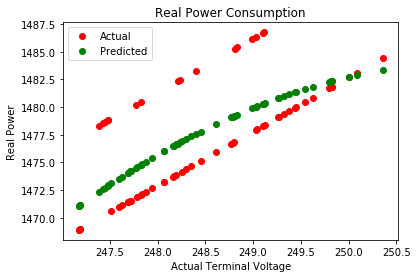

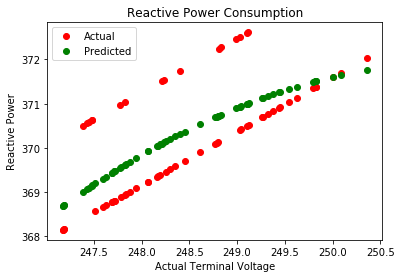

14 to 15


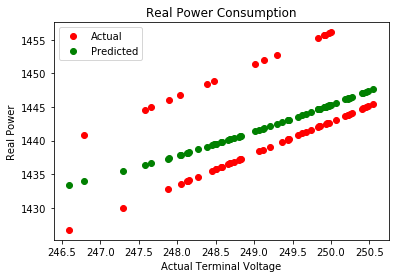

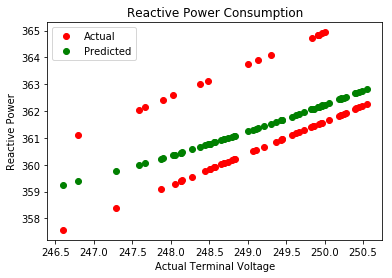

15 to 16


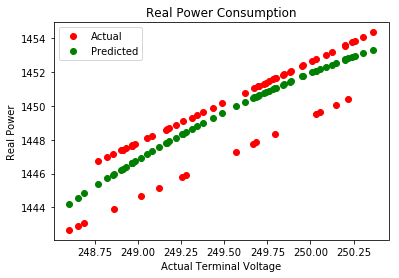

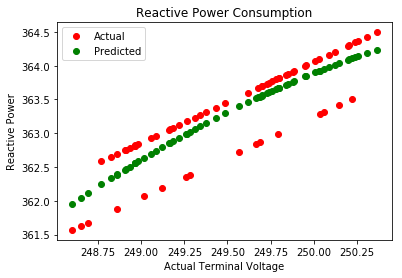

16 to 17


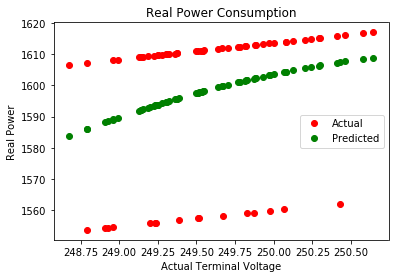

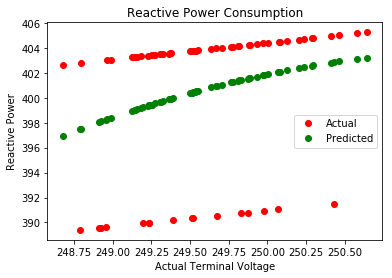

17 to 18


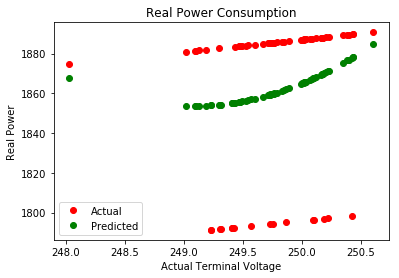

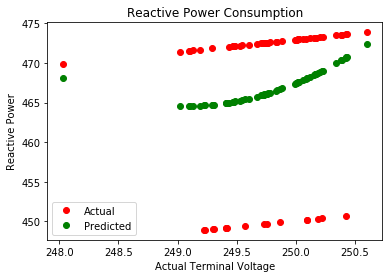

18 to 19


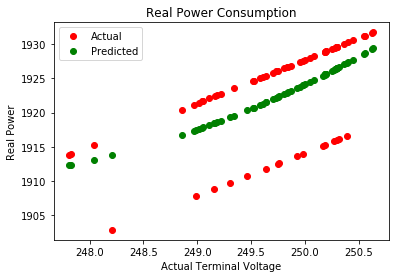

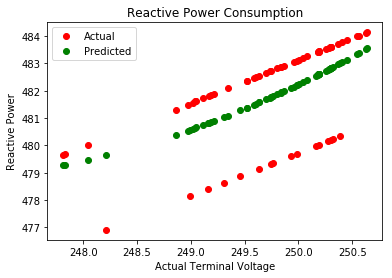

19 to 20


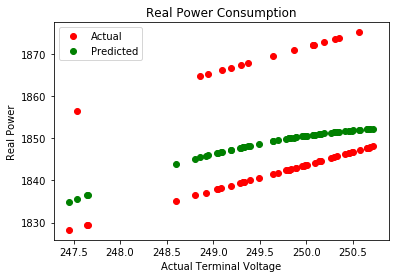

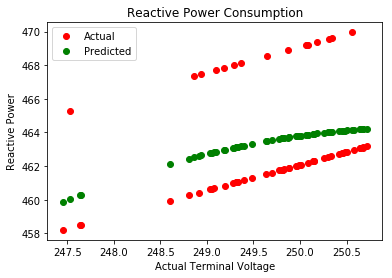

20 to 21


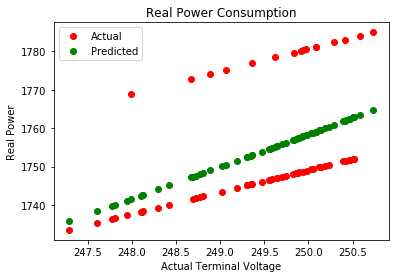

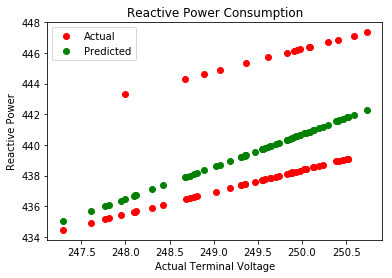

21 to 22


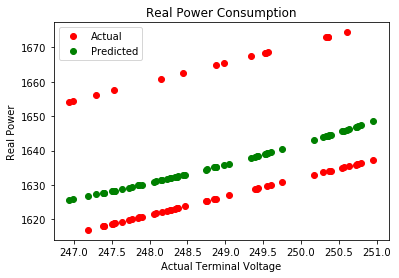

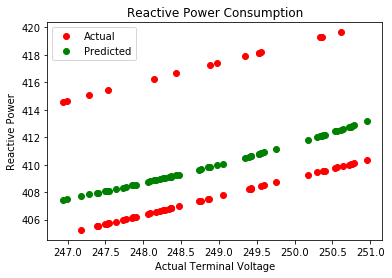

22 to 23


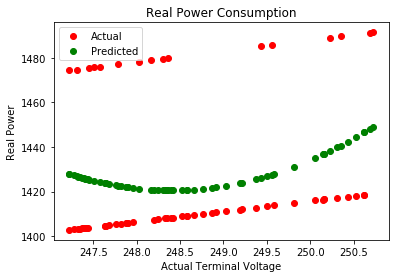

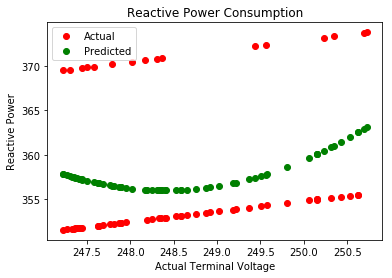

Season  2
2013-03-01
2013-05-15
Weekdays
0 to 1


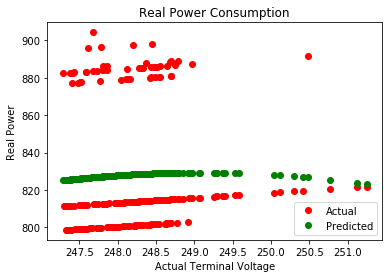

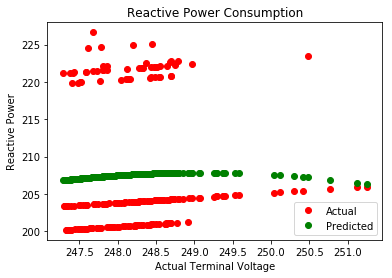

1 to 2


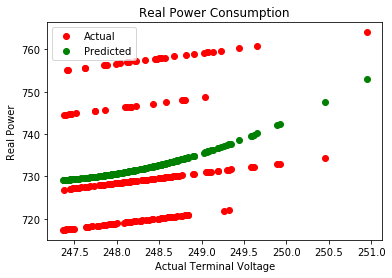

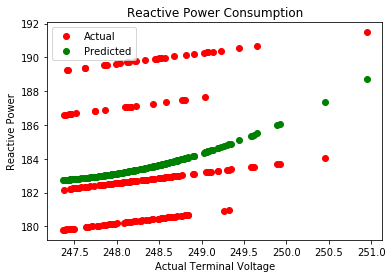

2 to 3


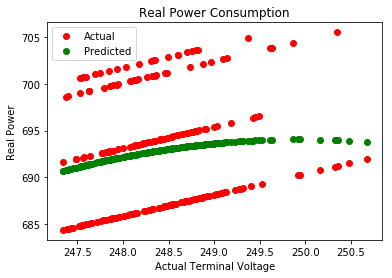

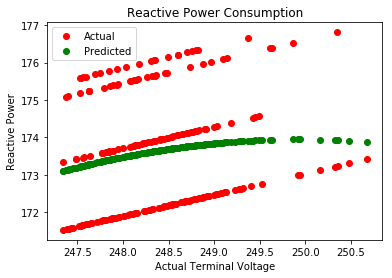

3 to 4


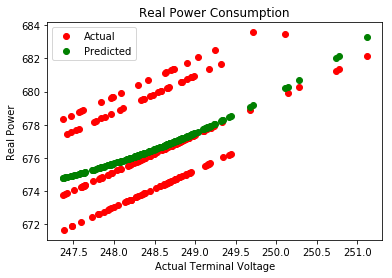

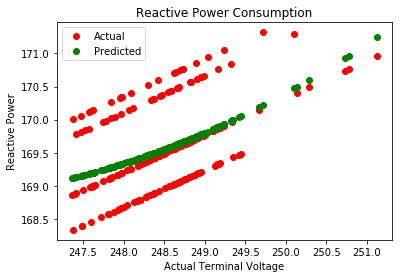

4 to 5


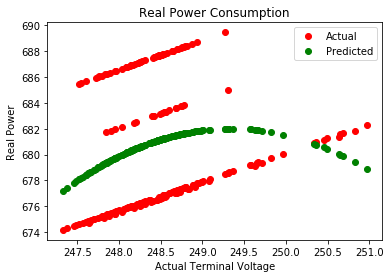

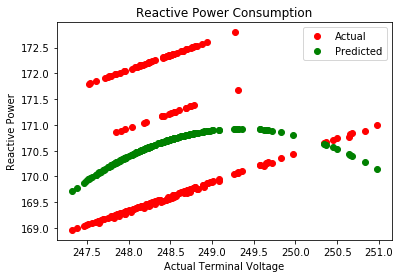

5 to 6


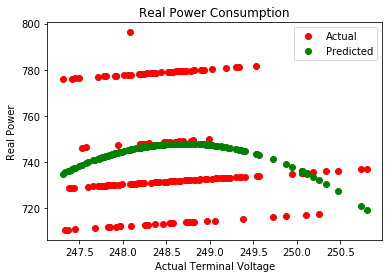

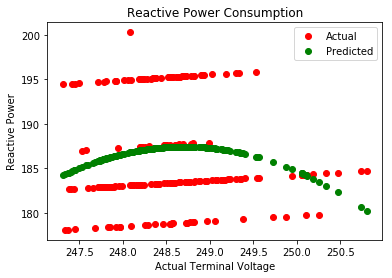

6 to 7


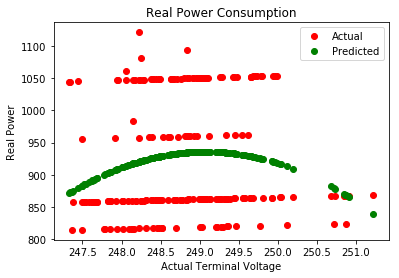

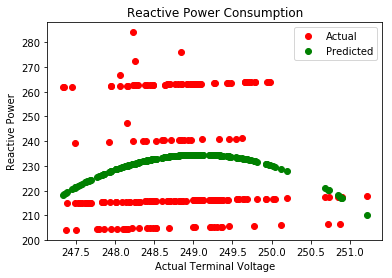

7 to 8


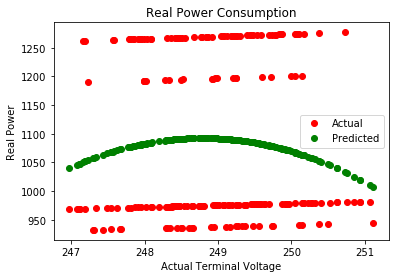

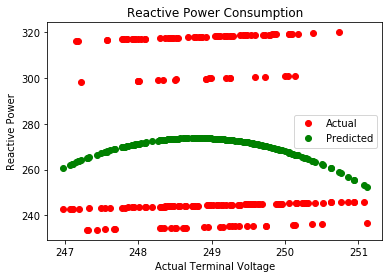

8 to 9


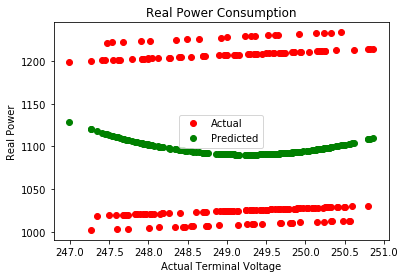

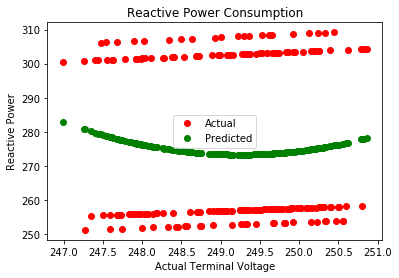

9 to 10


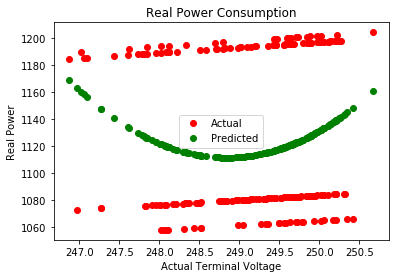

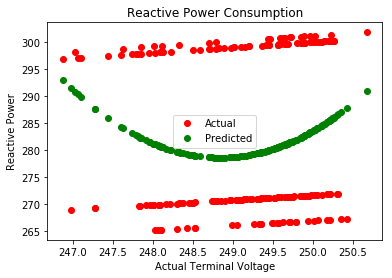

10 to 11


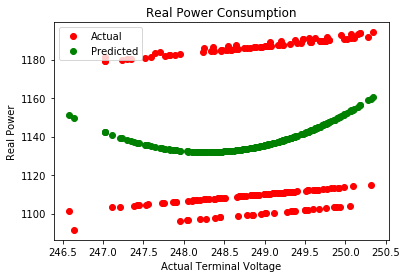

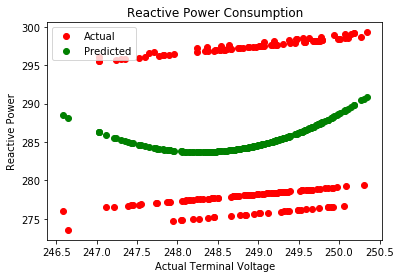

11 to 12


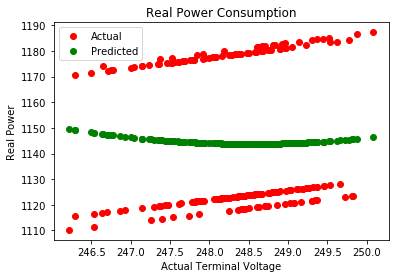

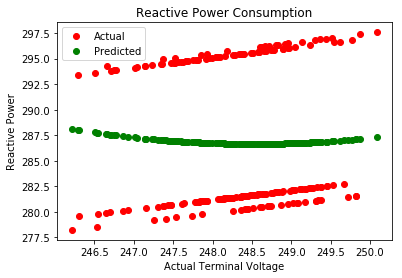

12 to 13


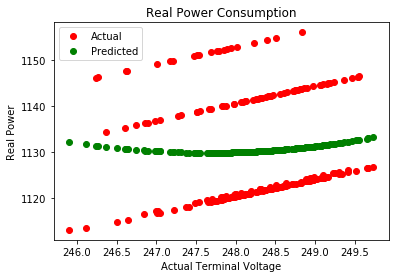

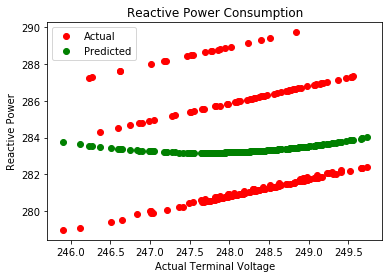

13 to 14


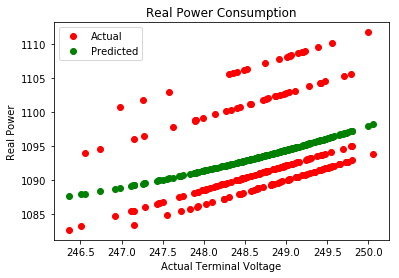

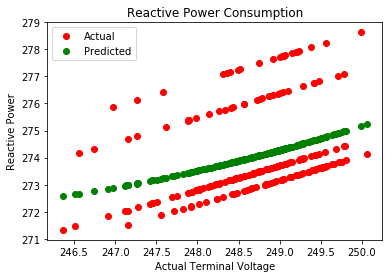

14 to 15


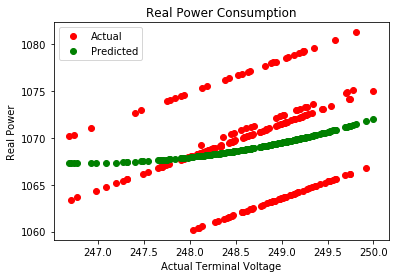

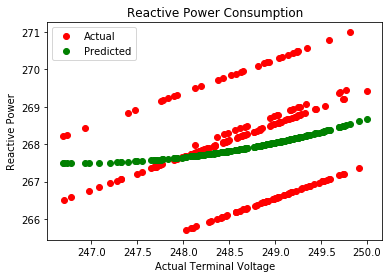

15 to 16


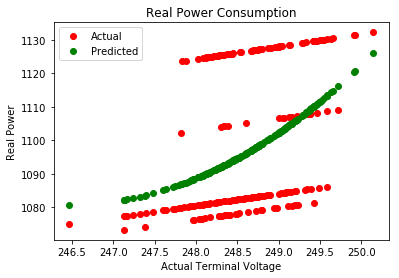

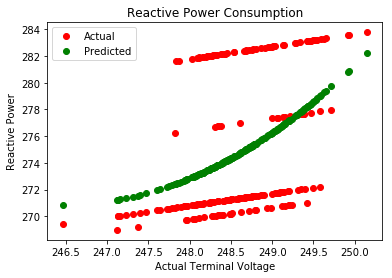

16 to 17


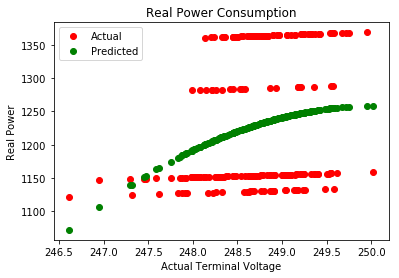

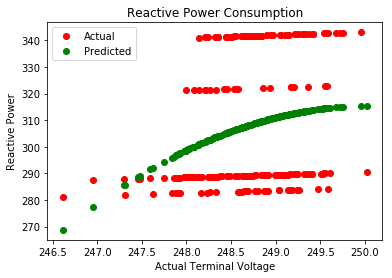

17 to 18


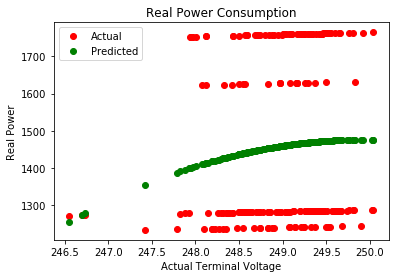

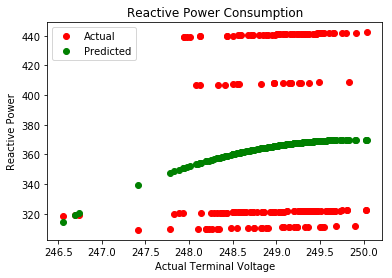

18 to 19


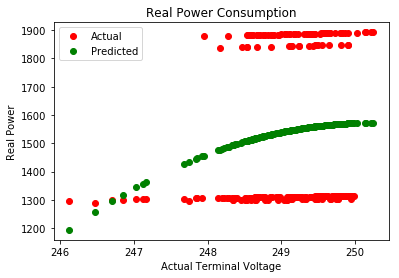

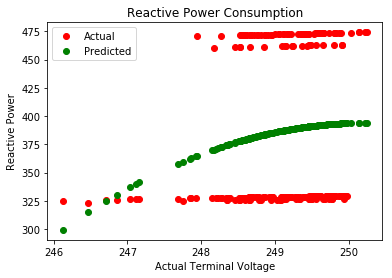

19 to 20


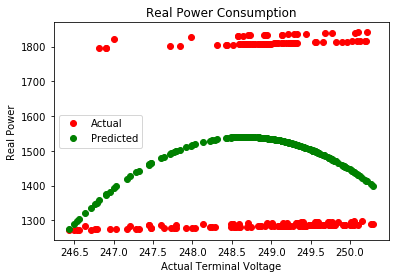

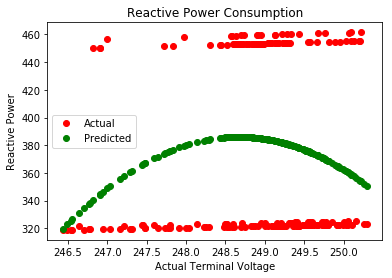

20 to 21


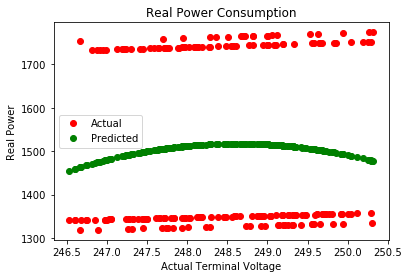

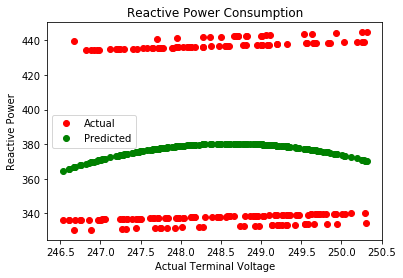

21 to 22


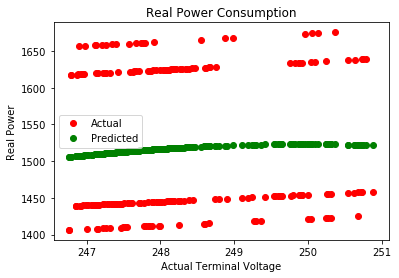

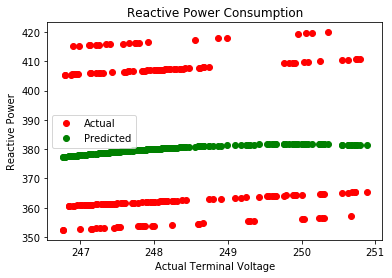

22 to 23


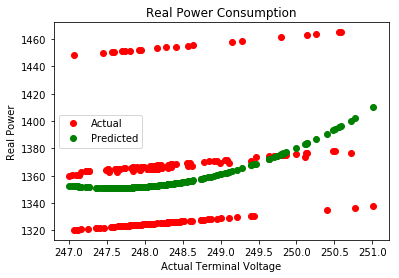

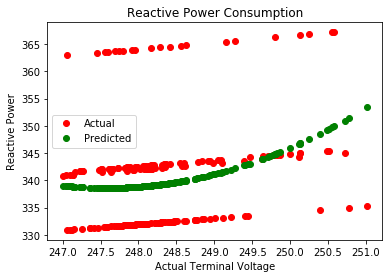

Weekends
0 to 1


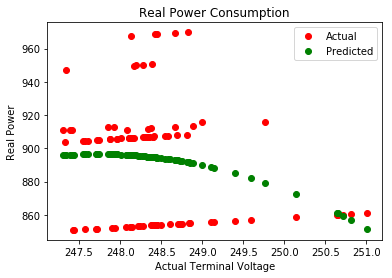

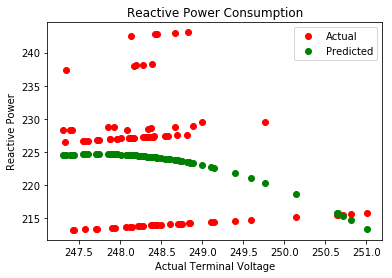

1 to 2


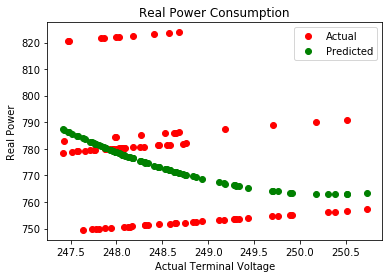

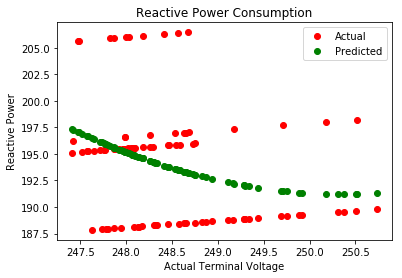

2 to 3


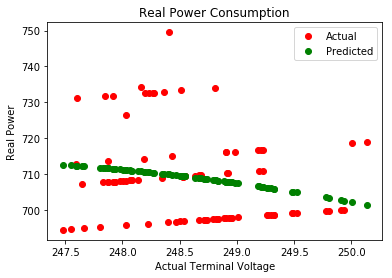

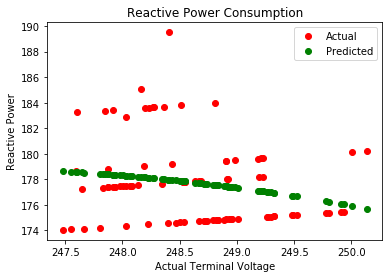

3 to 4


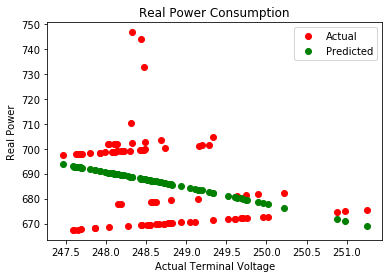

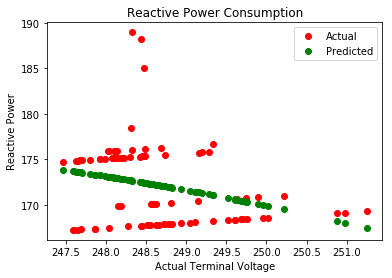

4 to 5


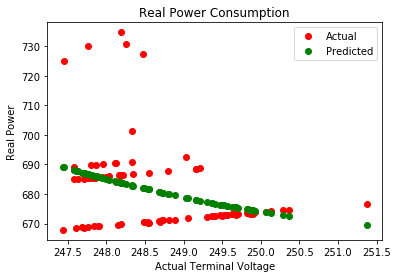

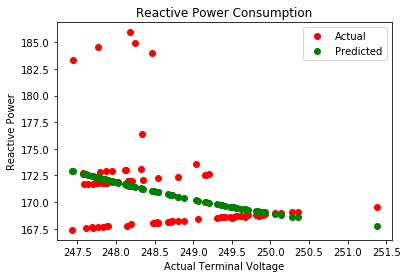

5 to 6


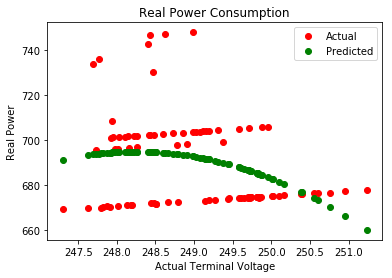

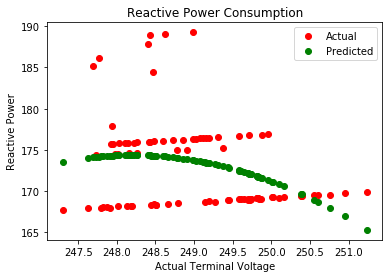

6 to 7


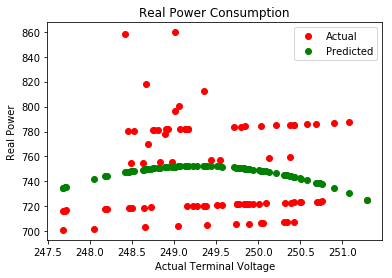

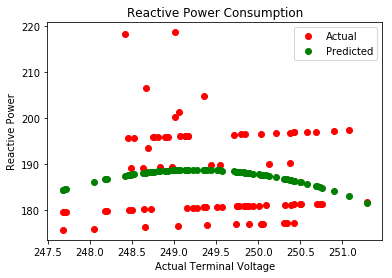

7 to 8


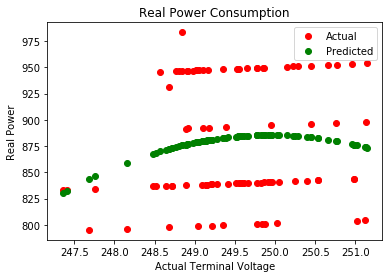

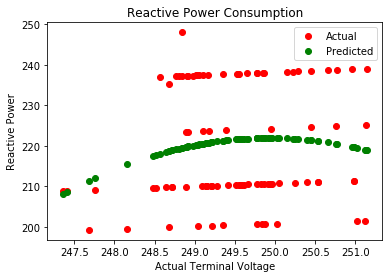

8 to 9


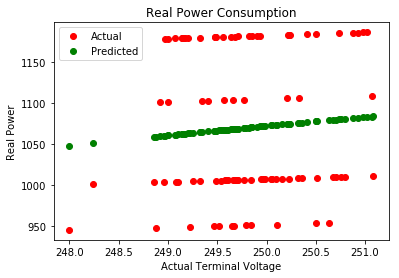

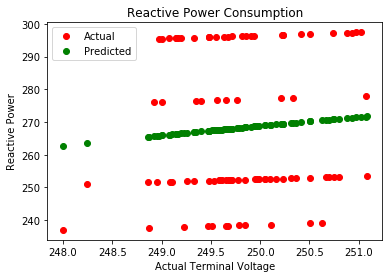

9 to 10


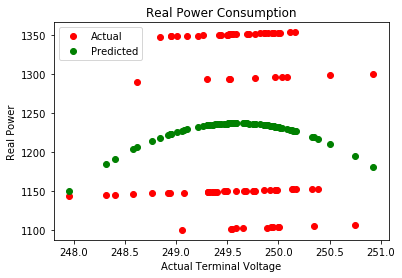

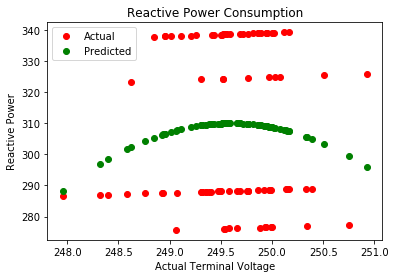

10 to 11


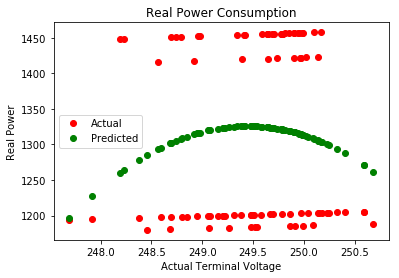

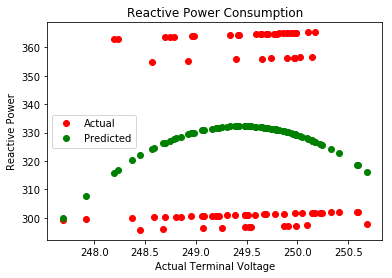

11 to 12


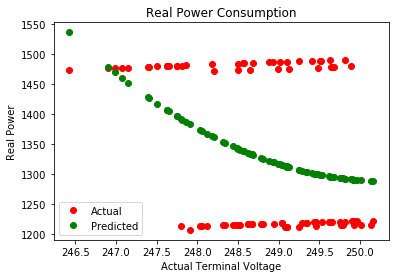

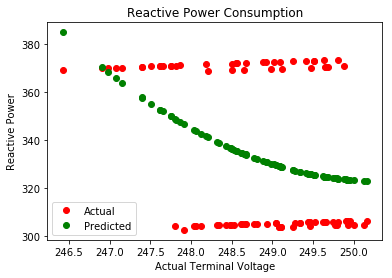

12 to 13


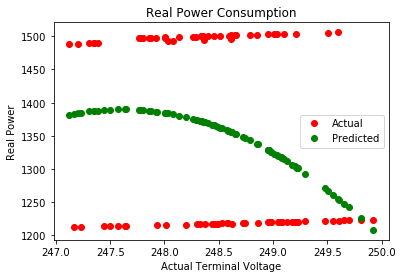

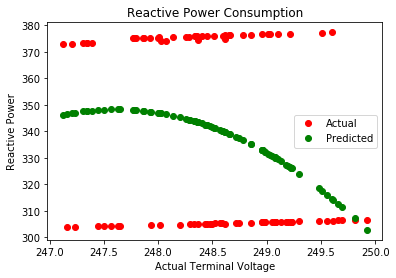

13 to 14


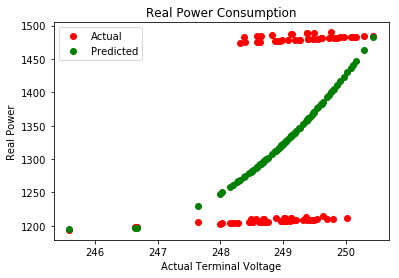

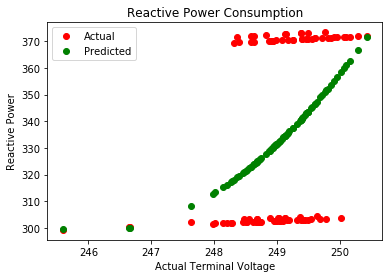

14 to 15


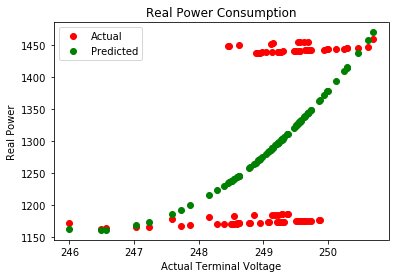

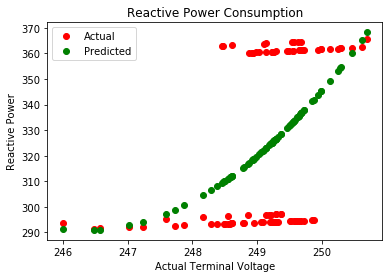

15 to 16


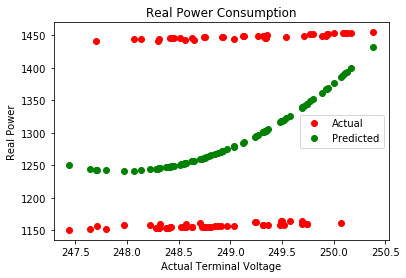

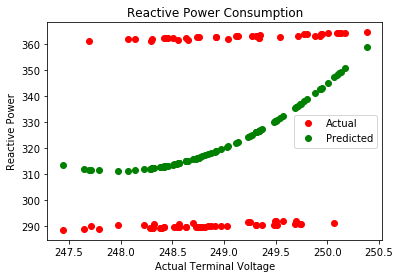

16 to 17


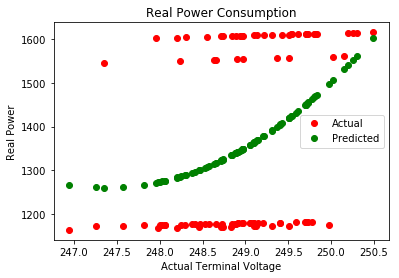

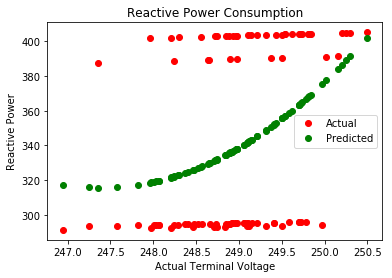

17 to 18


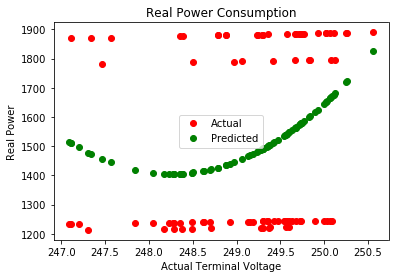

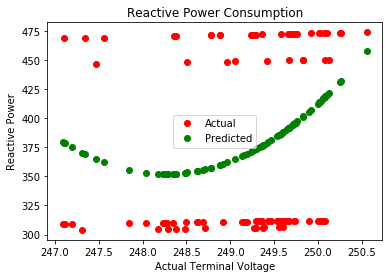

18 to 19


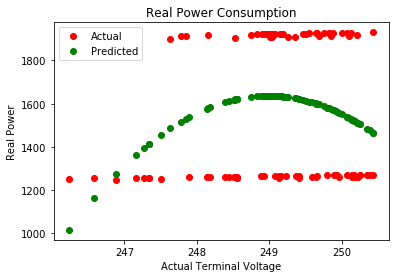

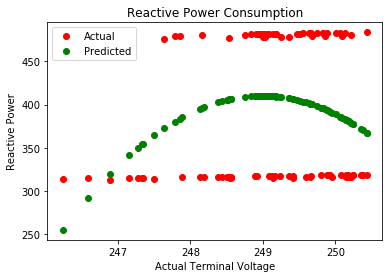

19 to 20


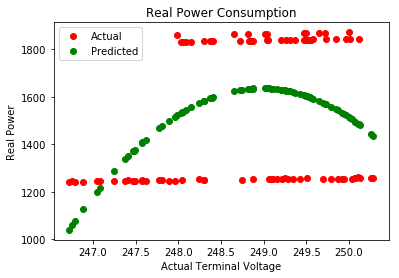

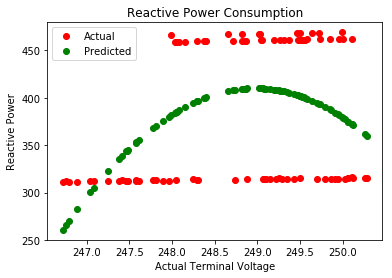

20 to 21


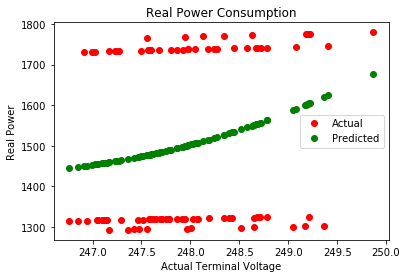

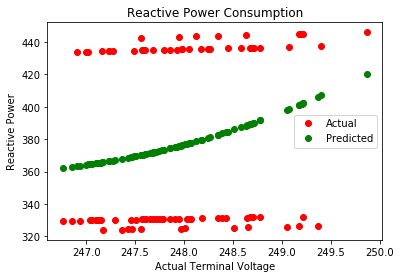

21 to 22


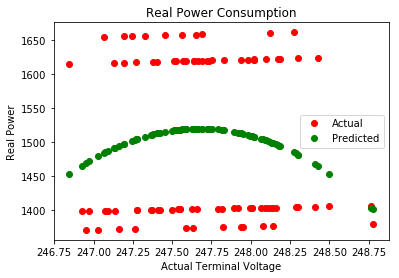

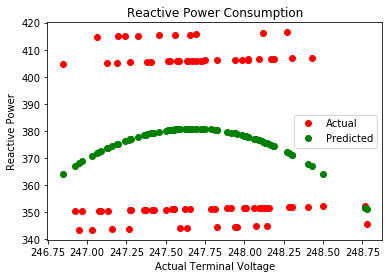

22 to 23


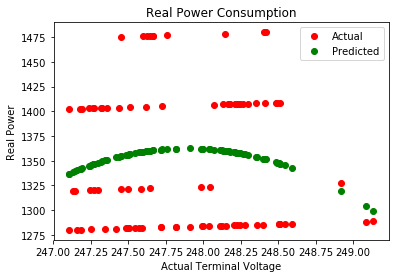

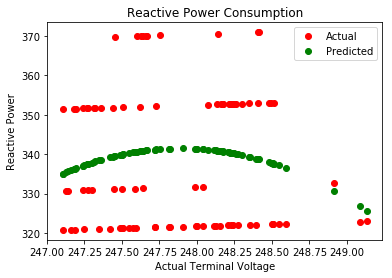

In [338]:
realCoefficients=[]
reactiveCoefficients=[]
hourwindow=1

for j in range(0,len(seasonDates)-1):
    realPowerSeason=realP[seasonDates[j]:seasonDates[j+1]]
    realVoltageSeason=realV[seasonDates[j]:seasonDates[j+1]]
    reactivePowerSeason=reactiveP[seasonDates[j]:seasonDates[j+1]]
    reactiveVoltageSeason=reactiveV[seasonDates[j]:seasonDates[j+1]]
    date_list=getDateList(seasonDates[j],seasonDates[j+1])
    print("Season ",j+1)
    print(seasonDates[j])
    print(seasonDates[j+1])
    #print(date_list)  
    
    for i in (0,1):
        if i==0: #weekdays
            days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==1 or day.isoweekday()==2 or day.isoweekday()==3 or day.isoweekday()==4 or day.isoweekday()==5)]
            print("Weekdays")
        else: #weekends
            days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==6 or day.isoweekday()==7)]
            print("Weekends")
        
            
        totalrealPower=getDays(realPowerSeason,days)
        totalrealVoltage=getDays(realVoltageSeason,days)
        totalreactivePower=getDays(reactivePowerSeason,days)
        totalreactiveVoltage=getDays(reactiveVoltageSeason,days)
        
        for hr in range(0,23):
            realPower=getHourData(totalrealPower,hourwindow,hr)
            realVoltage=getHourData(totalrealVoltage,hourwindow,hr)
            reactivePower=getHourData(totalreactivePower,hourwindow,hr)
            reactiveVoltage=getHourData(totalreactiveVoltage,hourwindow,hr)
            
            print(hr,"to",hr+hourwindow)
            hr=hr+hourwindow
            apparentVoltage=((realVoltage**2)+(reactiveVoltage**2))**0.5
            apparentPower=((realPower**2)+(reactivePower**2))**0.5
            independentVariable=apparentVoltage/apparentVoltage.mean() # or .median()
    
            columnNames=independentVariable.columns
    
            x=independentVariable[columnNames[1]]
            x=x.values
            
            xaxis=apparentVoltage[columnNames[1]]
            y1=realPower[columnNames[1]]
            y1=y1.values
            
            y2=reactivePower[columnNames[1]]
    
            coeff1=np.polyfit(x,y1,2)
            coeff2=np.polyfit(x,y2,2)
        
            xx= np.linspace(x.min(),x.max(),100)
            xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)

            poly1=np.poly1d(coeff1)
            fid,cx = pyplot.subplots()
    
            cx.plot(xaxis,y1,'ro',label='Actual')
            cx.plot(xaxis,np.polyval(coeff1,x),'go',label='Predicted')

            cx.legend()
            cx.set_title('Real Power Consumption')
            cx.set_xlabel('Actual Terminal Voltage')
            cx.set_ylabel('Real Power')
            pyplot.show()


            poly2=np.poly1d(coeff2)
            fid,cx = pyplot.subplots()

            cx.plot(xaxis,y2,'ro',label='Actual')
            cx.plot(xaxis,np.polyval(coeff2,x),'go',label='Predicted')

            cx.legend()
            cx.set_title('Reactive Power Consumption')
            cx.set_xlabel('Actual Terminal Voltage')
            cx.set_ylabel('Reactive Power')
            pyplot.show()

            realCoefficients.append(coeff1)
            reactiveCoefficients.append(coeff2)
    

In [ ]:
#realCoefficients
#reactiveCoefficients